## Introducción

vamos atomar una base de datos para predecir el precio de las casa de boston  a partir de las siguientes caracteristicas.


1. **CRIM**: Tasa de criminalidad per cápita por ciudad.
2. **ZN**: Proporción de tierra residencial dividida en zonas para lotes de más de 25,000 pies cuadrados.
3. **INDUS**: Proporción de acres de negocios no minoristas por ciudad.
4. **CHAS**: Variable ficticia Charles River.
    CHAS = 1 if traza limita con el río else 0
5. **NOX**: Concentración de óxidos nítricos (partes por 10 millones).
6. **RM**: Número promedio de habitaciones por vivienda.
7. **AGE**: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
8. **DIS**: Distancias ponderadas a cinco centros de empleo en Boston.
9. **RAD**: Índice de accesibilidad a carreteras radiales.
10. **TAX**: Tasa de impuesto a la propiedad de valor total por $10,000.
11. **PTRATIO**: Proporción alumno-profesor por ciudad.
12.  **B**:   1000*(Bk - 0.63)**2 donde Bk es la proporción de personas de origen afroamericano por ciudad.
13. **LSTAT**: Porcentaje de población de menor estatus.

objetivo predecir el valór de la vivienda medio

##Advertencia Ética

Es importante mencionar que al cargar el conjunto de datos, aparece una advertencia debido a los problemas éticos ***Aca debemos reflexionar un poco respecto a la ciencia de datos y la etica**. Sin embargo, para fines educativos y de demostración, se procedió con el análisis **sin tener en cuenta B**.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

# import el dataset
boston_data = load_boston()

print(boston_data.DESCR)

ImportError: ignored

Debido a los problemas éticos asociados con el conjunto de datos de viviendas de Boston, muchas bibliotecas y plataformas están evitando o desaconsejando su uso. Para fines academicos  y reflexivos, aún es posible obtener el conjunto de datos desde otras fuentes en línea.

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

## VISUALIZACIÓN
 Se grafica las relaciones entre cada característica y la variable objetivo "MEDV" (valor mediano de las viviendas) del conjunto de datos de viviendas de Boston. Estas gráficas te ayudarán a visualizar cómo cada característica se relaciona con el valor mediano de las viviendas.

Es importante mencionar que al cargar el conjunto de datos, aparece una advertencia debido a los problemas éticos mencionados anteriormente. Sin embargo, para fines educativos y de demostración, procederemos con el análisis.

Con base en las gráficas, puedes observar ciertas tendencias y relaciones entre las características y el valor mediano de las viviendas. Por ejemplo, "RM" (número promedio de habitaciones por vivienda) parece tener una relación lineal positiva con "MEDV", mientras que "LSTAT" (porcentaje de población de menor estatus) parece tener una relación lineal negativa.

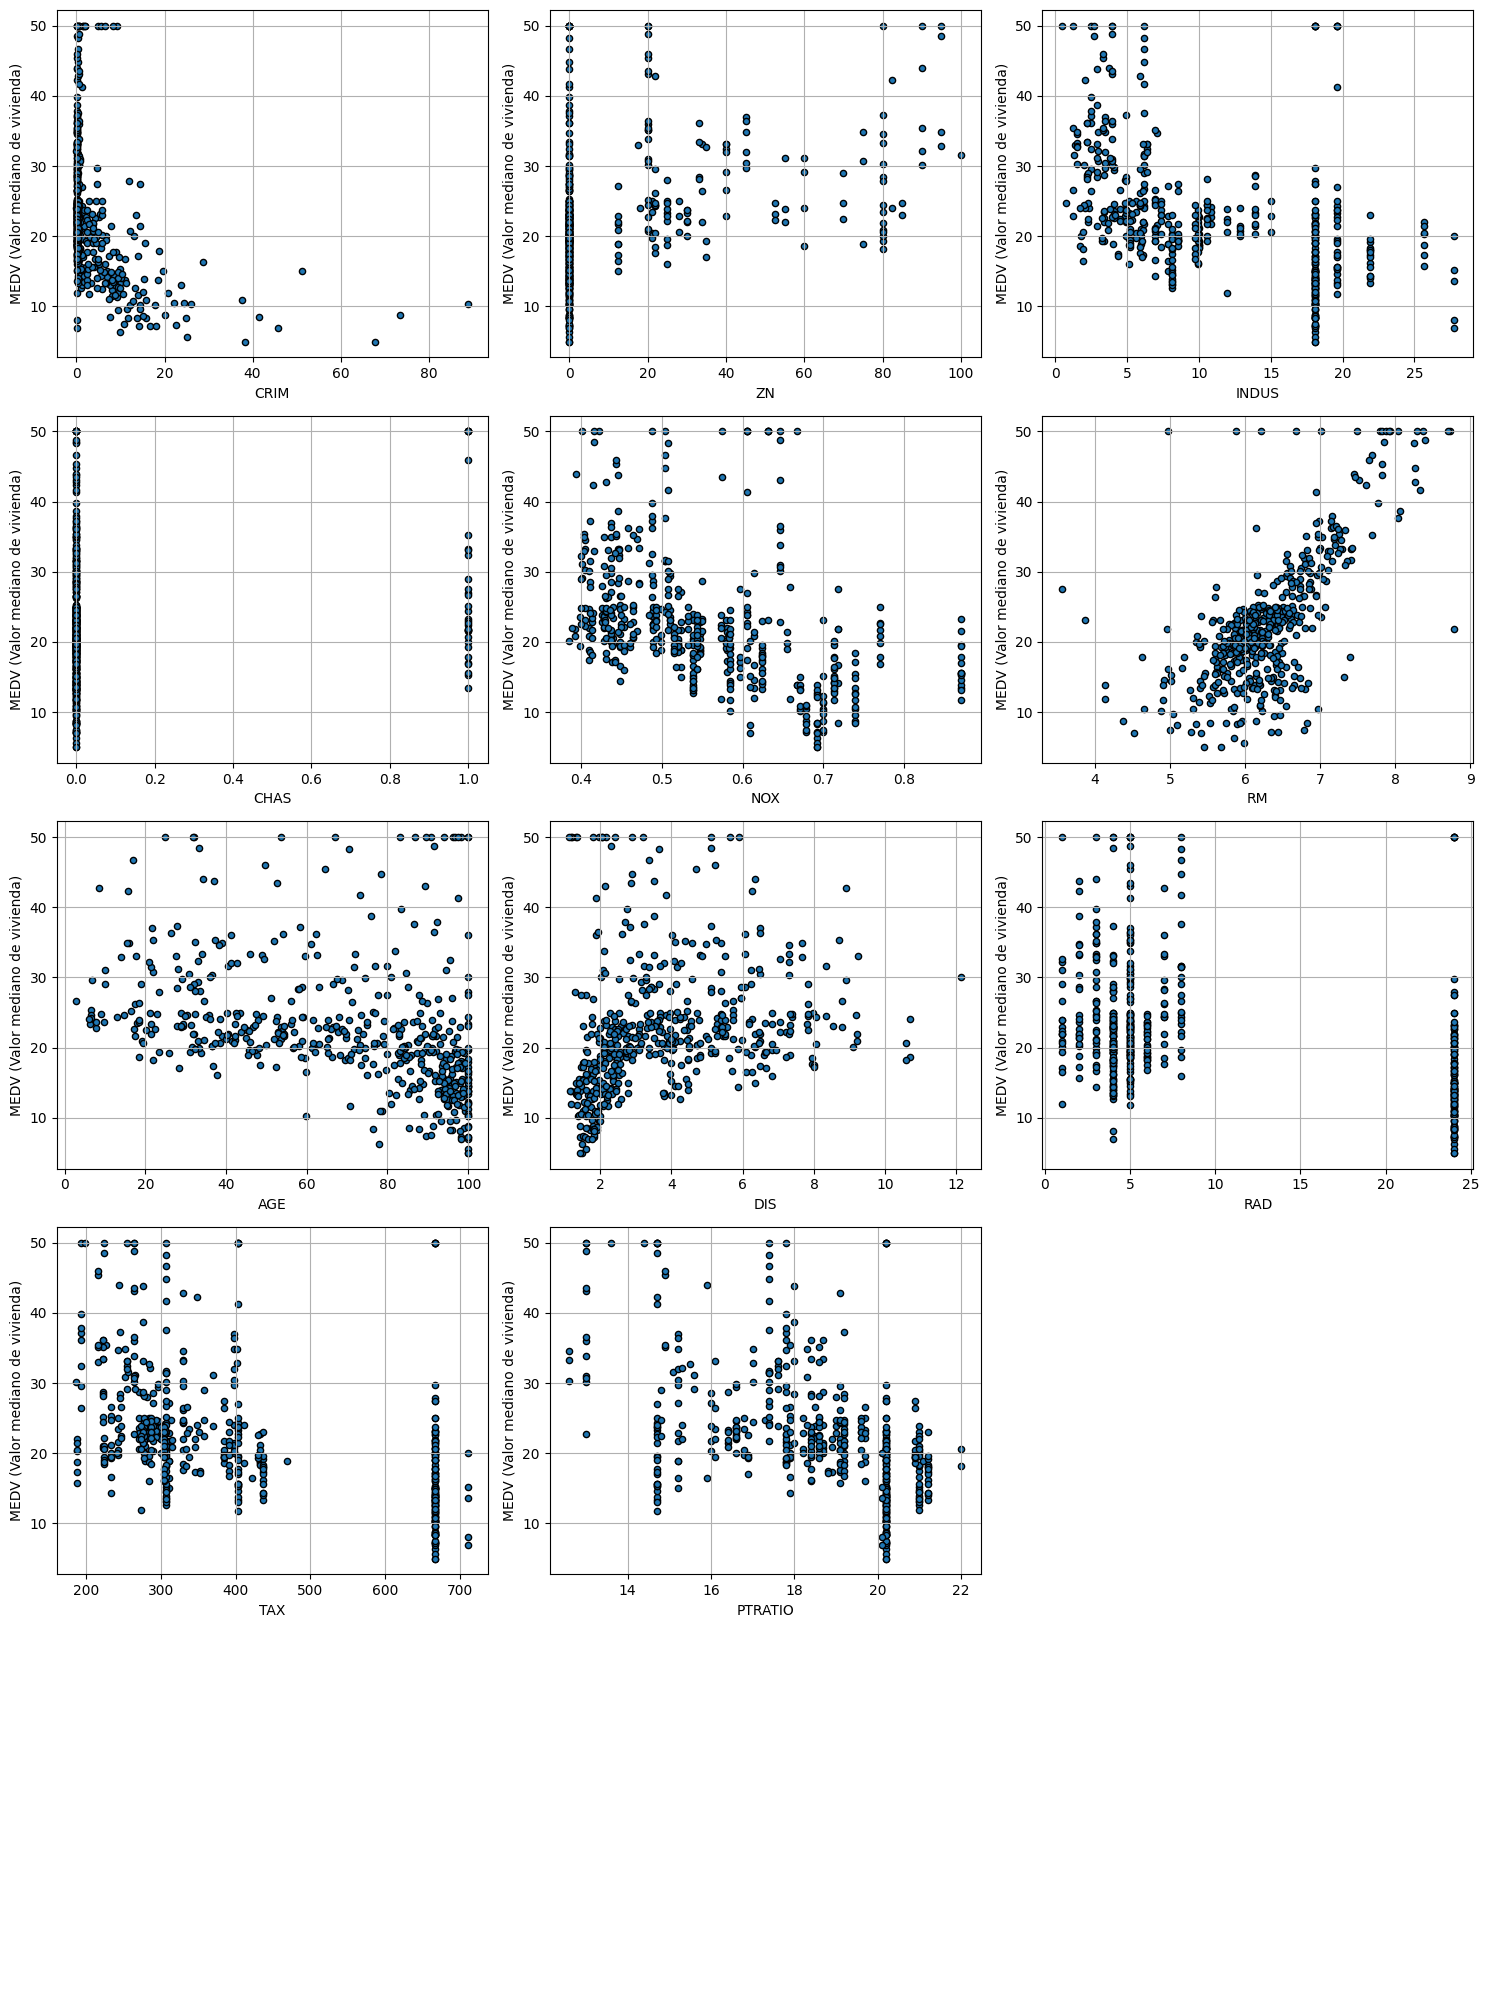

In [ ]:
# Convertir los datos y el objetivo a un DataFrame
df = pd.DataFrame(data)
df['target'] = target

# Nombres de las características para referencia
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO"]

# Graficar cada característica contra la etiqueta
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

for i, ax in enumerate(axes.ravel()):
    if i > len(feature_names)-1:
        ax.axis('off')  # Desactivar ejes adicionales
        continue
    ax.scatter(df[i], df['target'], edgecolor='k', s=20)
    ax.set_ylabel("MEDV (Valor mediano de vivienda)")
    ax.set_xlabel(feature_names[i])
    ax.grid(True)

plt.tight_layout()
plt.show()


## Validación Cruzada

Realiza las técnicas de validación Genera un conjunto de modelos de regresión Lineal  y polinomio y entrega el mejor modelo usando validación k-fold  y LOOCV

Qué características seleccionas para realizar la predicción Para la medida de calidad usa RMSE

Puedes usar  los datos dados en el colab del 1 laboratorio o usar las librerias  sklearn

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt

In [ ]:
k=10
cv = KFold(n_splits=k,shuffle=True, random_state=1)

model = LinearRegression()

mse_score = []

for train_index , test_index in cv.split(df):
    X_train , X_test = df.drop(columns=[11,12,"target"]).iloc[train_index,:],df.drop(columns=[11,12,"target"]).iloc[test_index,:]
    y_train , y_test = df["target"][train_index] , df["target"][test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_values)
    mse_score.append(mse**0.5)

avg_acc_score = sum(mse_score)/k

In [ ]:
print('RMSE of each fold - {}'.format(mse_score))
print('Avg RMSE : {}'.format(avg_acc_score))

RMSE of each fold - [5.302524738659567, 5.383689942829715, 3.2409849975906098, 7.916551428476365, 3.888781709159134, 4.224566046225089, 3.8322599140742577, 7.611642825407093, 6.787447671695673, 3.1415614824637195]
Avg RMSE : 5.1330010756581235


In [1]:
plt.hist(mse_score,bins=k)
plt.xlabel('RMSE')
plt.ylabel('Frecuencia')
plt.show()

NameError: ignored

In [ ]:
k=10
cv = KFold(n_splits=k,shuffle=True, random_state=1)

loo = LeaveOneOut()
loo.get_n_splits(df)

model = LinearRegression()

mse_score = []

for i, (train_index, test_index) in enumerate(loo.split(df)):
  X_train , X_test = df.drop(columns=[11,12,"target"]).iloc[train_index,:],df.drop(columns=[11,12,"target"]).iloc[test_index,:]
  y_train , y_test = df["target"][train_index] , df["target"][test_index]

  model.fit(X_train,y_train)
  pred_values = model.predict(X_test)
  mse = mean_squared_error(y_test, pred_values)
  mse_score.append(mse**0.5)

avg_acc_score = sum(mse_score)/k

In [ ]:
print('RMSE of each fold - {}'.format(mse_score))
print('Avg RMSE : {}'.format(avg_acc_score))

RMSE of each fold - [208.9396088492093, 26.555882798954393, 894.5135946744107, 1603.9615780413462, 5610.871568857722, 1012.3148613388805, 0.001311239565224238, 934.0822844885524, 6.460839993395915, 2.6732397657821094, 3395.7312039825983, 17.484310442823638, 8.537272099497814, 139.38402361742286, 0.8286315328691435, 87.77821111241818, 430.90031858218316, 0.048265739401673856, 191.17791067055168, 4.862148430985783, 0.4096794580506864, 54.17510124254615, 53.794963826044544, 0.571535243327275, 0.004662399218242231, 0.004723542246714086, 8.433364411907034, 14.400367019875977, 0.4876946756492108, 2.653794576998196e-05, 19.51093143193345, 26.700320128506885, 240.72910378328743, 27.637371028043805, 309.36712370832277, 123.17519308772292, 14.006886064309022, 1.0138812899405147, 3.7706396131304523, 0.017617722583839125, 7.049625590874551, 32.60260020265495, 0.001593061101343373, 0.20965100967442366, 10.759911220562552, 47.748794686301736, 44.16309527570839, 313.71317221344776, 10.872270381367835

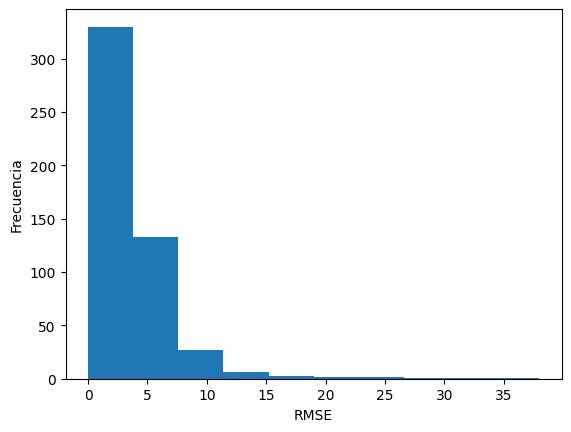

In [ ]:
plt.hist(mse_score)
plt.xlabel('RMSE')
plt.ylabel('Frecuencia')
plt.show()

## Boostrap

Eres un analista especializado en el mercado inmobiliario. Con el conjunto de datos proporcionado anteriormente, tu tarea es predecir el valor de las viviendas utilizando solamente dos características. Para validar la precisión y robustez de tu modelo, emplearás la técnica de bootstrap. Para llevar a cabo este procedimiento en Python, debes hacer uso de la función resample que se encuentra en el módulo scikit-learn.utils.

pseudo codigo

1. Selecciona una muestra con reemplazo

    X_sample, y_sample = resample(X_selected, y, n_samples=bootstrap_size)
    
2. Entrena el modelo

3. Hace predicciones sobre todo el conjunto de datos

4. Calcula el error cuadrático medio y guardalo


```
mse = mean_squared_error(y, y_pred)
mse_values.append(mse)
```


    

5. Analizar y visualizar la distribución de mse_values para obtener insights sobre la variabilidad y precisión del modelo.